In [1]:
from __future__ import print_function

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('data/real_estate_data.csv')

In [3]:
df = df.drop_duplicates()

In [4]:
df.shape

(1883, 26)

_Checking for structural errors in_ `'basement'` _given the heatmap._ 

In [5]:
df.basement.unique()

array([ nan,   1.])

In [6]:
df['basement'] = df.basement.fillna(0)

In [7]:
df.basement.unique()

array([ 0.,  1.])

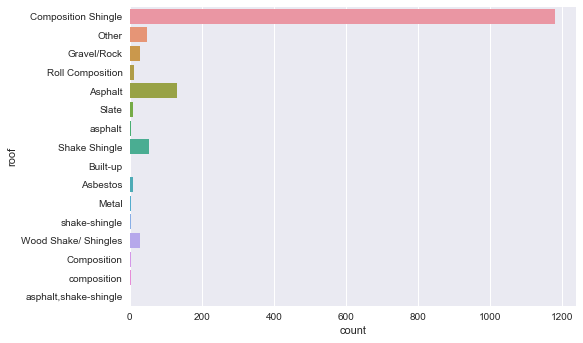

In [10]:
sns.countplot(y = 'roof', data = df)
plt.show()

_Accounting for and fixing redundancies in categorical data._

In [11]:
df.roof.replace('composition', 'Composition', inplace = True)
df.roof.replace('asphalt', 'Asphalt', inplace = True)
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace = True)

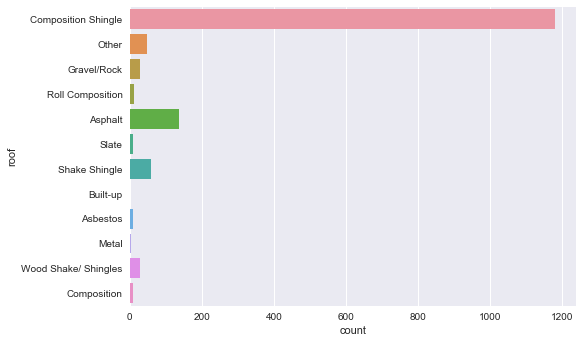

In [13]:
sns.countplot(y = 'roof', data = df)
plt.show()

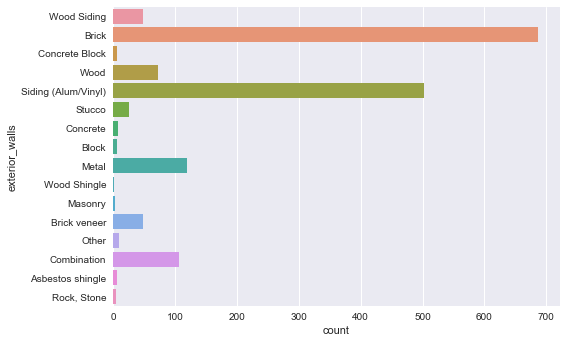

In [14]:
sns.countplot(y = 'exterior_walls', data = df)
plt.show()

In [15]:
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace = True)
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace = True)

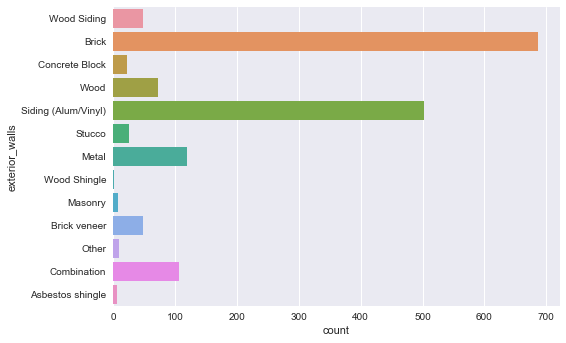

In [17]:
sns.countplot(y = 'exterior_walls', data = df)
plt.show()

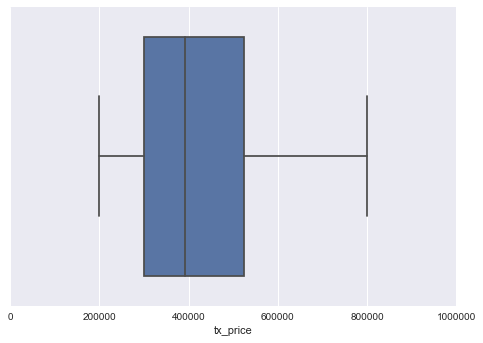

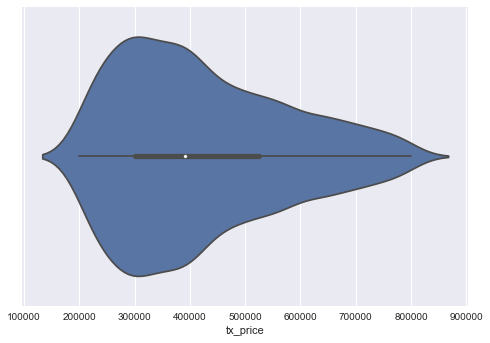

In [26]:
sns.boxplot(df.tx_price)
plt.xlim(0, 1000000)
plt.show()

sns.violinplot(df.tx_price)
plt.show()

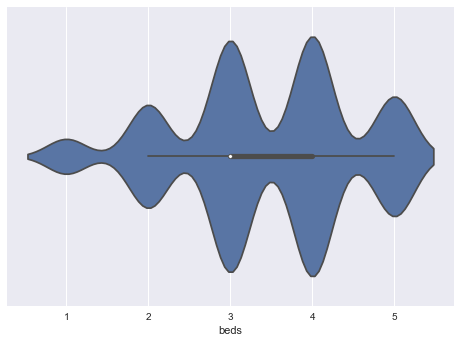

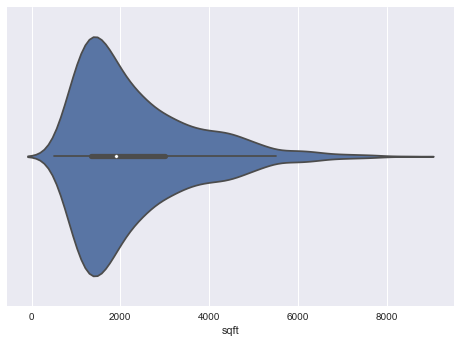

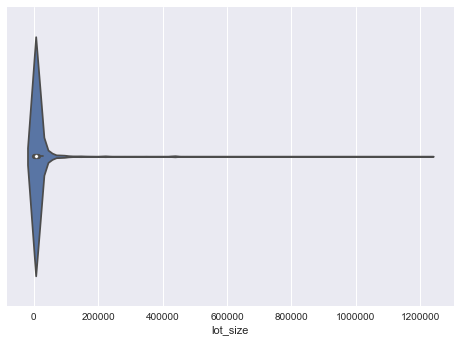

In [27]:
to_plot = [df.beds, df.sqft, df.lot_size]

for x in to_plot:
    sns.violinplot(x)
    plt.show()

_Check_ `'lot_size'` _for possible outlier._

In [28]:
df.lot_size.sort_values(ascending = False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [29]:
df = df[df.lot_size <= 500000]

df.shape

(1882, 26)

_Label missing categorical data._

In [30]:
df.select_dtypes(include = ['object']).isnull().sum()

property_type       0
exterior_walls    223
roof              353
dtype: int64

In [32]:
for column in df.select_dtypes(include = ['object']):
    df[column] = df[column].fillna('Missing')
    
df.select_dtypes(include = ['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

_Check for missing numeric data._


In [33]:
df.select_dtypes(exclude = ['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [34]:
df.to_csv('data/cleaned_df.csv', index = None)